<a href="https://colab.research.google.com/github/notice4/bank-customer-churn-analytics/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/notice4/bank-customer-churn-analytics/refs/heads/main/data/bank_churn_dataset.csv')
data

,client_id,age,region,months_with_bank,balance,transactions_last_month,mobile_app_logins,support_calls,has_credit,has_deposit,service_fee,churn
0,1,56,Kutaisi,10,1552.13,78,30,0,0,0,0,0
1,2,69,Tbilisi,96,9848.44,85,12,5,0,0,5,0
2,3,46,Tbilisi,98,13604.78,93,25,5,1,0,0,0
3,4,32,Other,48,2531.24,106,43,6,0,0,5,0
4,5,60,Other,20,14524.90,39,11,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,33,Rustavi,76,4844.68,77,49,2,1,0,0,0
2996,2997,71,Tbilisi,7,3558.82,40,46,2,1,0,0,0
2997,2998,63,Rustavi,49,3939.50,81,25,3,0,0,0,0
2998,2999,69,Batumi,26,7566.32,50,0,1,0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                3000 non-null   int64  
 1   age                      3000 non-null   int64  
 2   region                   3000 non-null   object 
 3   months_with_bank         3000 non-null   int64  
 4   balance                  3000 non-null   float64
 5   transactions_last_month  3000 non-null   int64  
 6   mobile_app_logins        3000 non-null   int64  
 7   support_calls            3000 non-null   int64  
 8   has_credit               3000 non-null   int64  
 9   has_deposit              3000 non-null   int64  
 10  service_fee              3000 non-null   int64  
 11  churn                    3000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 281.4+ KB


In [4]:
data['region'].unique()

array(['Kutaisi', 'Tbilisi', 'Other', 'Batumi', 'Rustavi'], dtype=object)

In [5]:
data['region'] = data['region'].map({'Tbilisi':0, 'Kutaisi':1, 'Batumi':2, 'Rustavi':3, 'Other':4})
data

,client_id,age,region,months_with_bank,balance,transactions_last_month,mobile_app_logins,support_calls,has_credit,has_deposit,service_fee,churn
0,1,56,1,10,1552.13,78,30,0,0,0,0,0
1,2,69,0,96,9848.44,85,12,5,0,0,5,0
2,3,46,0,98,13604.78,93,25,5,1,0,0,0
3,4,32,4,48,2531.24,106,43,6,0,0,5,0
4,5,60,4,20,14524.90,39,11,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,33,3,76,4844.68,77,49,2,1,0,0,0
2996,2997,71,0,7,3558.82,40,46,2,1,0,0,0
2997,2998,63,3,49,3939.50,81,25,3,0,0,0,0
2998,2999,69,2,26,7566.32,50,0,1,0,1,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                3000 non-null   int64  
 1   age                      3000 non-null   int64  
 2   region                   3000 non-null   int64  
 3   months_with_bank         3000 non-null   int64  
 4   balance                  3000 non-null   float64
 5   transactions_last_month  3000 non-null   int64  
 6   mobile_app_logins        3000 non-null   int64  
 7   support_calls            3000 non-null   int64  
 8   has_credit               3000 non-null   int64  
 9   has_deposit              3000 non-null   int64  
 10  service_fee              3000 non-null   int64  
 11  churn                    3000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 281.4 KB


In [7]:
data.shape

(3000, 12)

In [8]:
data.isnull().sum()

,0
client_id,0
age,0
region,0
months_with_bank,0
balance,0
transactions_last_month,0
mobile_app_logins,0
support_calls,0
has_credit,0
has_deposit,0


In [9]:
data.duplicated().sum()

np.int64(0)

<Axes: >

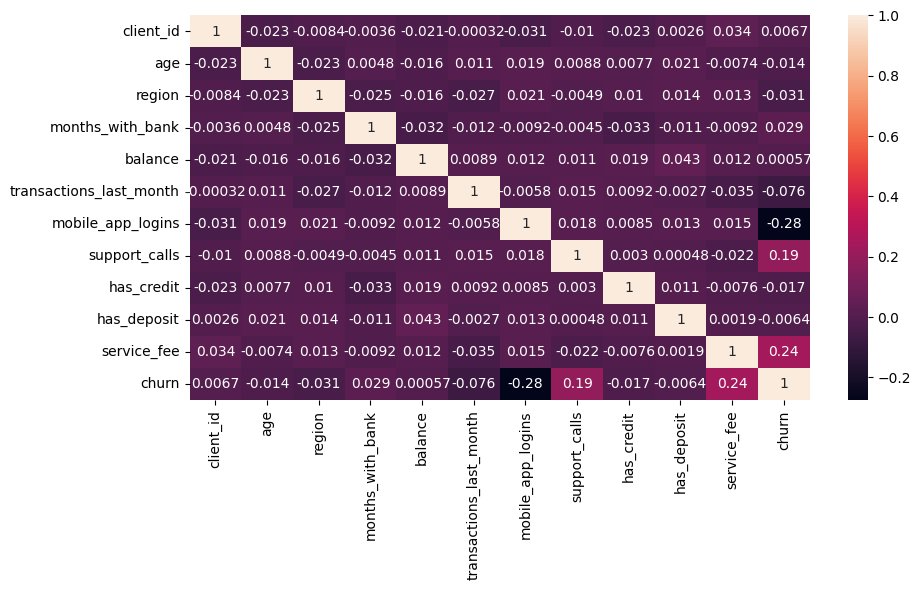

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [16]:
data['churn'].unique()

array([0, 1])

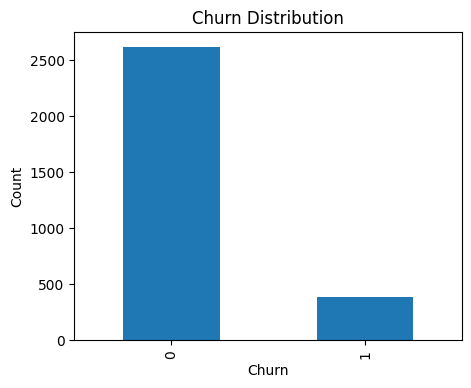

In [15]:
plt.figure(figsize=(5,4))
data["churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

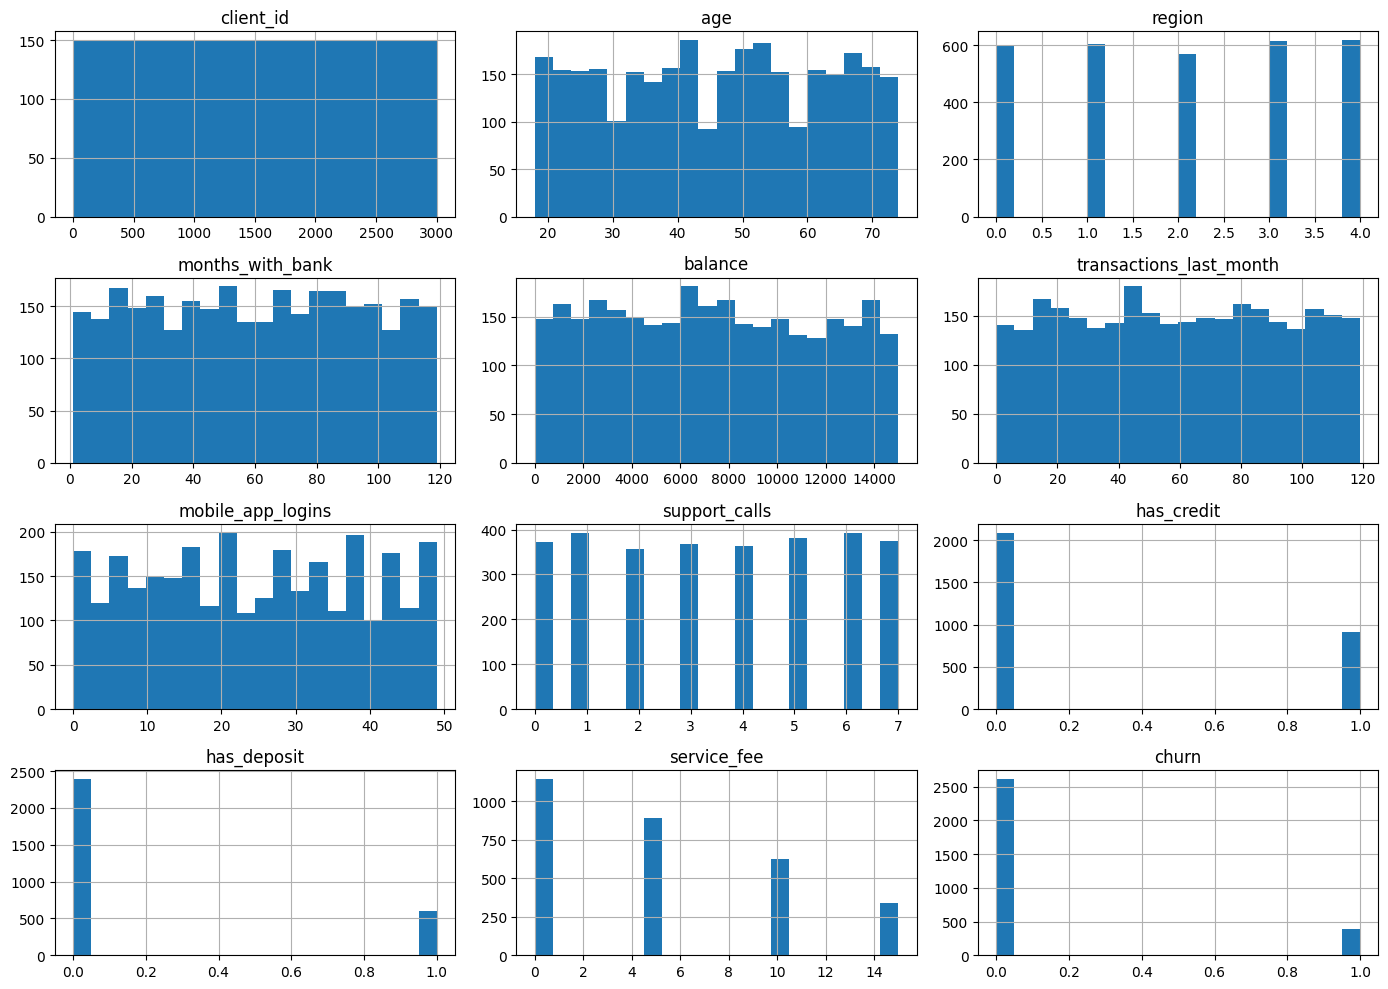

In [20]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

data[numeric_cols].hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()

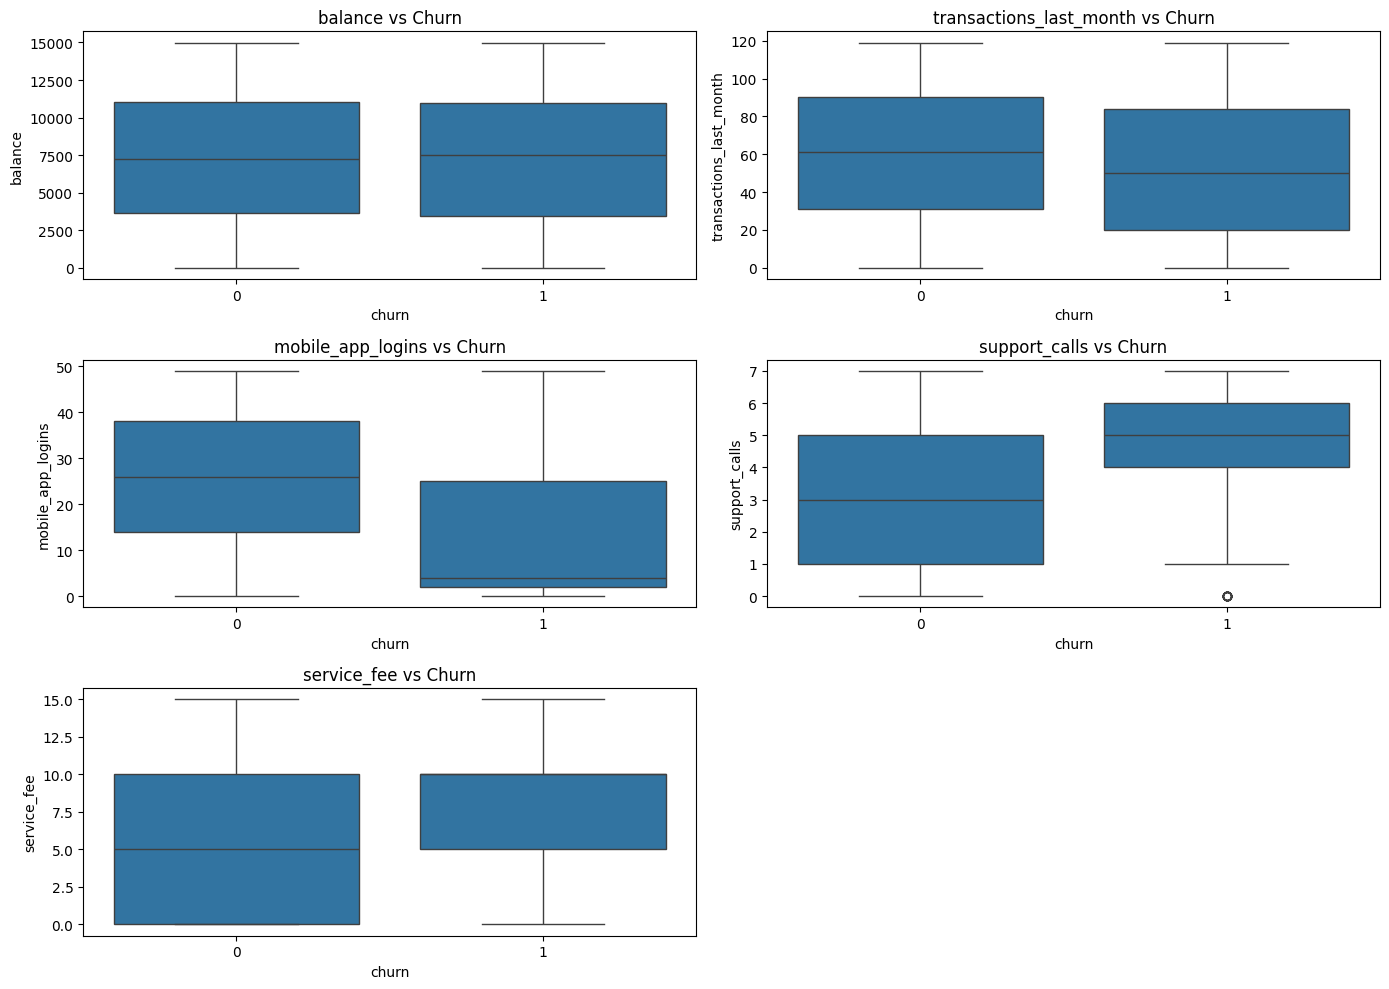

In [22]:
features = [
    "balance",
    "transactions_last_month",
    "mobile_app_logins",
    "support_calls",
    "service_fee"
]

plt.figure(figsize=(14,10))
for i, col in enumerate(features):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=data["churn"], y=data[col])
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()


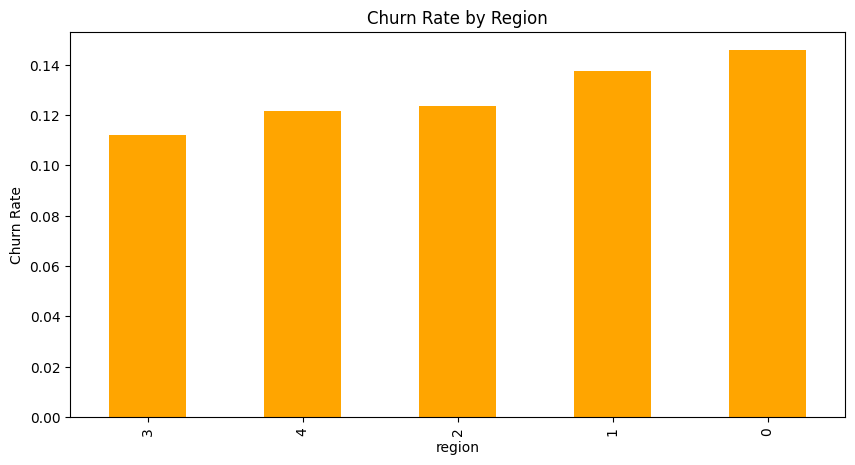

In [23]:
region_churn = data.groupby("region")["churn"].mean().sort_values()

plt.figure(figsize=(10,5))
region_churn.plot(kind="bar", color="orange")
plt.title("Churn Rate by Region")
plt.ylabel("Churn Rate")
plt.show()

In [24]:
print("Key Findings:")
print("- Higher churn among customers with fewer mobile app logins")
print("- High service fees correlate with churn")
print("- More support calls → higher chance to churn")
print("- Customers with low transactions churn more")

Key Findings:
- Higher churn among customers with fewer mobile app logins
- High service fees correlate with churn
- More support calls → higher chance to churn
- Customers with low transactions churn more
